In [1]:
# Importing libraries:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Importing the os library specifically for reading the csv once I've created the file in my working directory.
import os

# web-based requests
import requests
import datetime

In [2]:
from vega_datasets import data
data.sf_temps()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [3]:
print(pd.__version__)

1.1.3


# Exercises

In [4]:
temp_df = data.sf_temps()
temp_df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [8]:
temp_df = temp_df.set_index('date').sort_index()

In [9]:
temp_df.isnull().sum()

temp    0
dtype: int64

In [10]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    8759 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


#### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [11]:
# Showing the table of temps, by the average temp per day.
temp_df.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


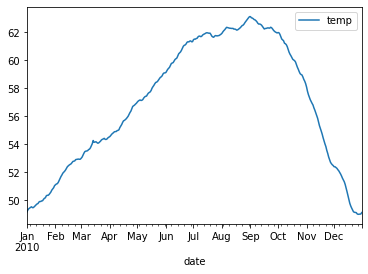

In [16]:
# Plotting

temp_df.resample('D').mean().plot()
plt.show()

#### 2. Write the code necessary to visualize the minimum temperature over time.

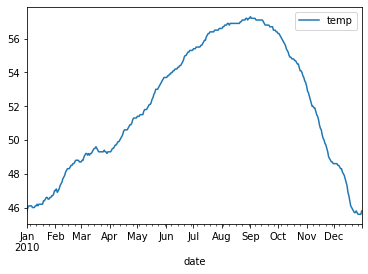

In [15]:
temp_df.resample('D').min().plot()
plt.show()

#### 3. Write the code necessary to visualize the maximum temperature over time.

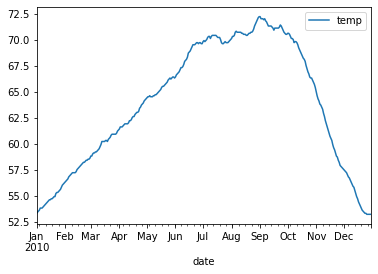

In [17]:
temp_df.resample('D').max().plot()
plt.show()

#### 4. Which month is the coldest, on average?

In [28]:
# I need to find a list of all months, so resample to the average temp of each month, 
# then find the .min() of that new list of monthly averages.

pd.DataFrame(temp_df.resample('M').mean().min(), columns = temp_df.columns)

,temp
temp,49.98414


In [29]:
temp_df.resample('M').mean()

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


January 2010 was the coldest average month, according to this data.

#### 5. Which month has the highest average temperature?

In [32]:
pd.DataFrame(temp_df.resample('M').mean().max(), columns = temp_df.columns)

,temp
temp,62.487083


In [33]:
print("September had the highest average monthly temperatures")

September had the highest average monthly temperatures


#### 6. Resample by the day and calculate the min and max temp for the day (Hint: `.agg(['min', 'max'])`). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [37]:
temp_df['2010-01-02'].shape

(24, 1)